# Question 1

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('data.csv', header=12)

In [39]:
filter_1 = data['D (Mpc)'][:1500]

In [40]:
final_data = filter_1[filter_1 < 4]

In [56]:
n = len(final_data)
final_data

27      0.916
28      0.929
29      0.951
30      0.955
31      0.964
        ...  
1448    0.863
1449    0.752
1450    0.813
1451    0.700
1452    0.382
Name: D (Mpc), Length: 170, dtype: float64

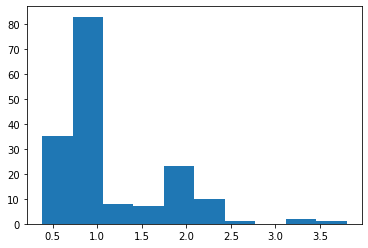

In [42]:
plt.hist(final_data, bins=10)
plt.title('')
plt.show()

In [47]:
counts, bins = np.histogram(final_data, bins=10)

In [51]:
h = bins[1] - bins[0]

In [57]:
p = counts / (h * n)

In [58]:
p

array([0.60234743, 1.42842391, 0.13767941, 0.12046949, 0.39582831,
       0.17209927, 0.01720993, 0.        , 0.03441985, 0.01720993])

In [69]:
estimator = []
bin_widths = []
for bin_count in range(1, 1001):
    counts, bins = np.histogram(final_data, bins=bin_count)
    bin_width = bins[1] - bins[0]
    estimate = (1/(n**2 * bin_width)) * np.sum(counts**2)
    estimate -= (2/(n*(n-1)*bin_width)) * np.sum(counts**2 - counts)
    estimator.append(estimate)
    bin_widths.append(bin_width)

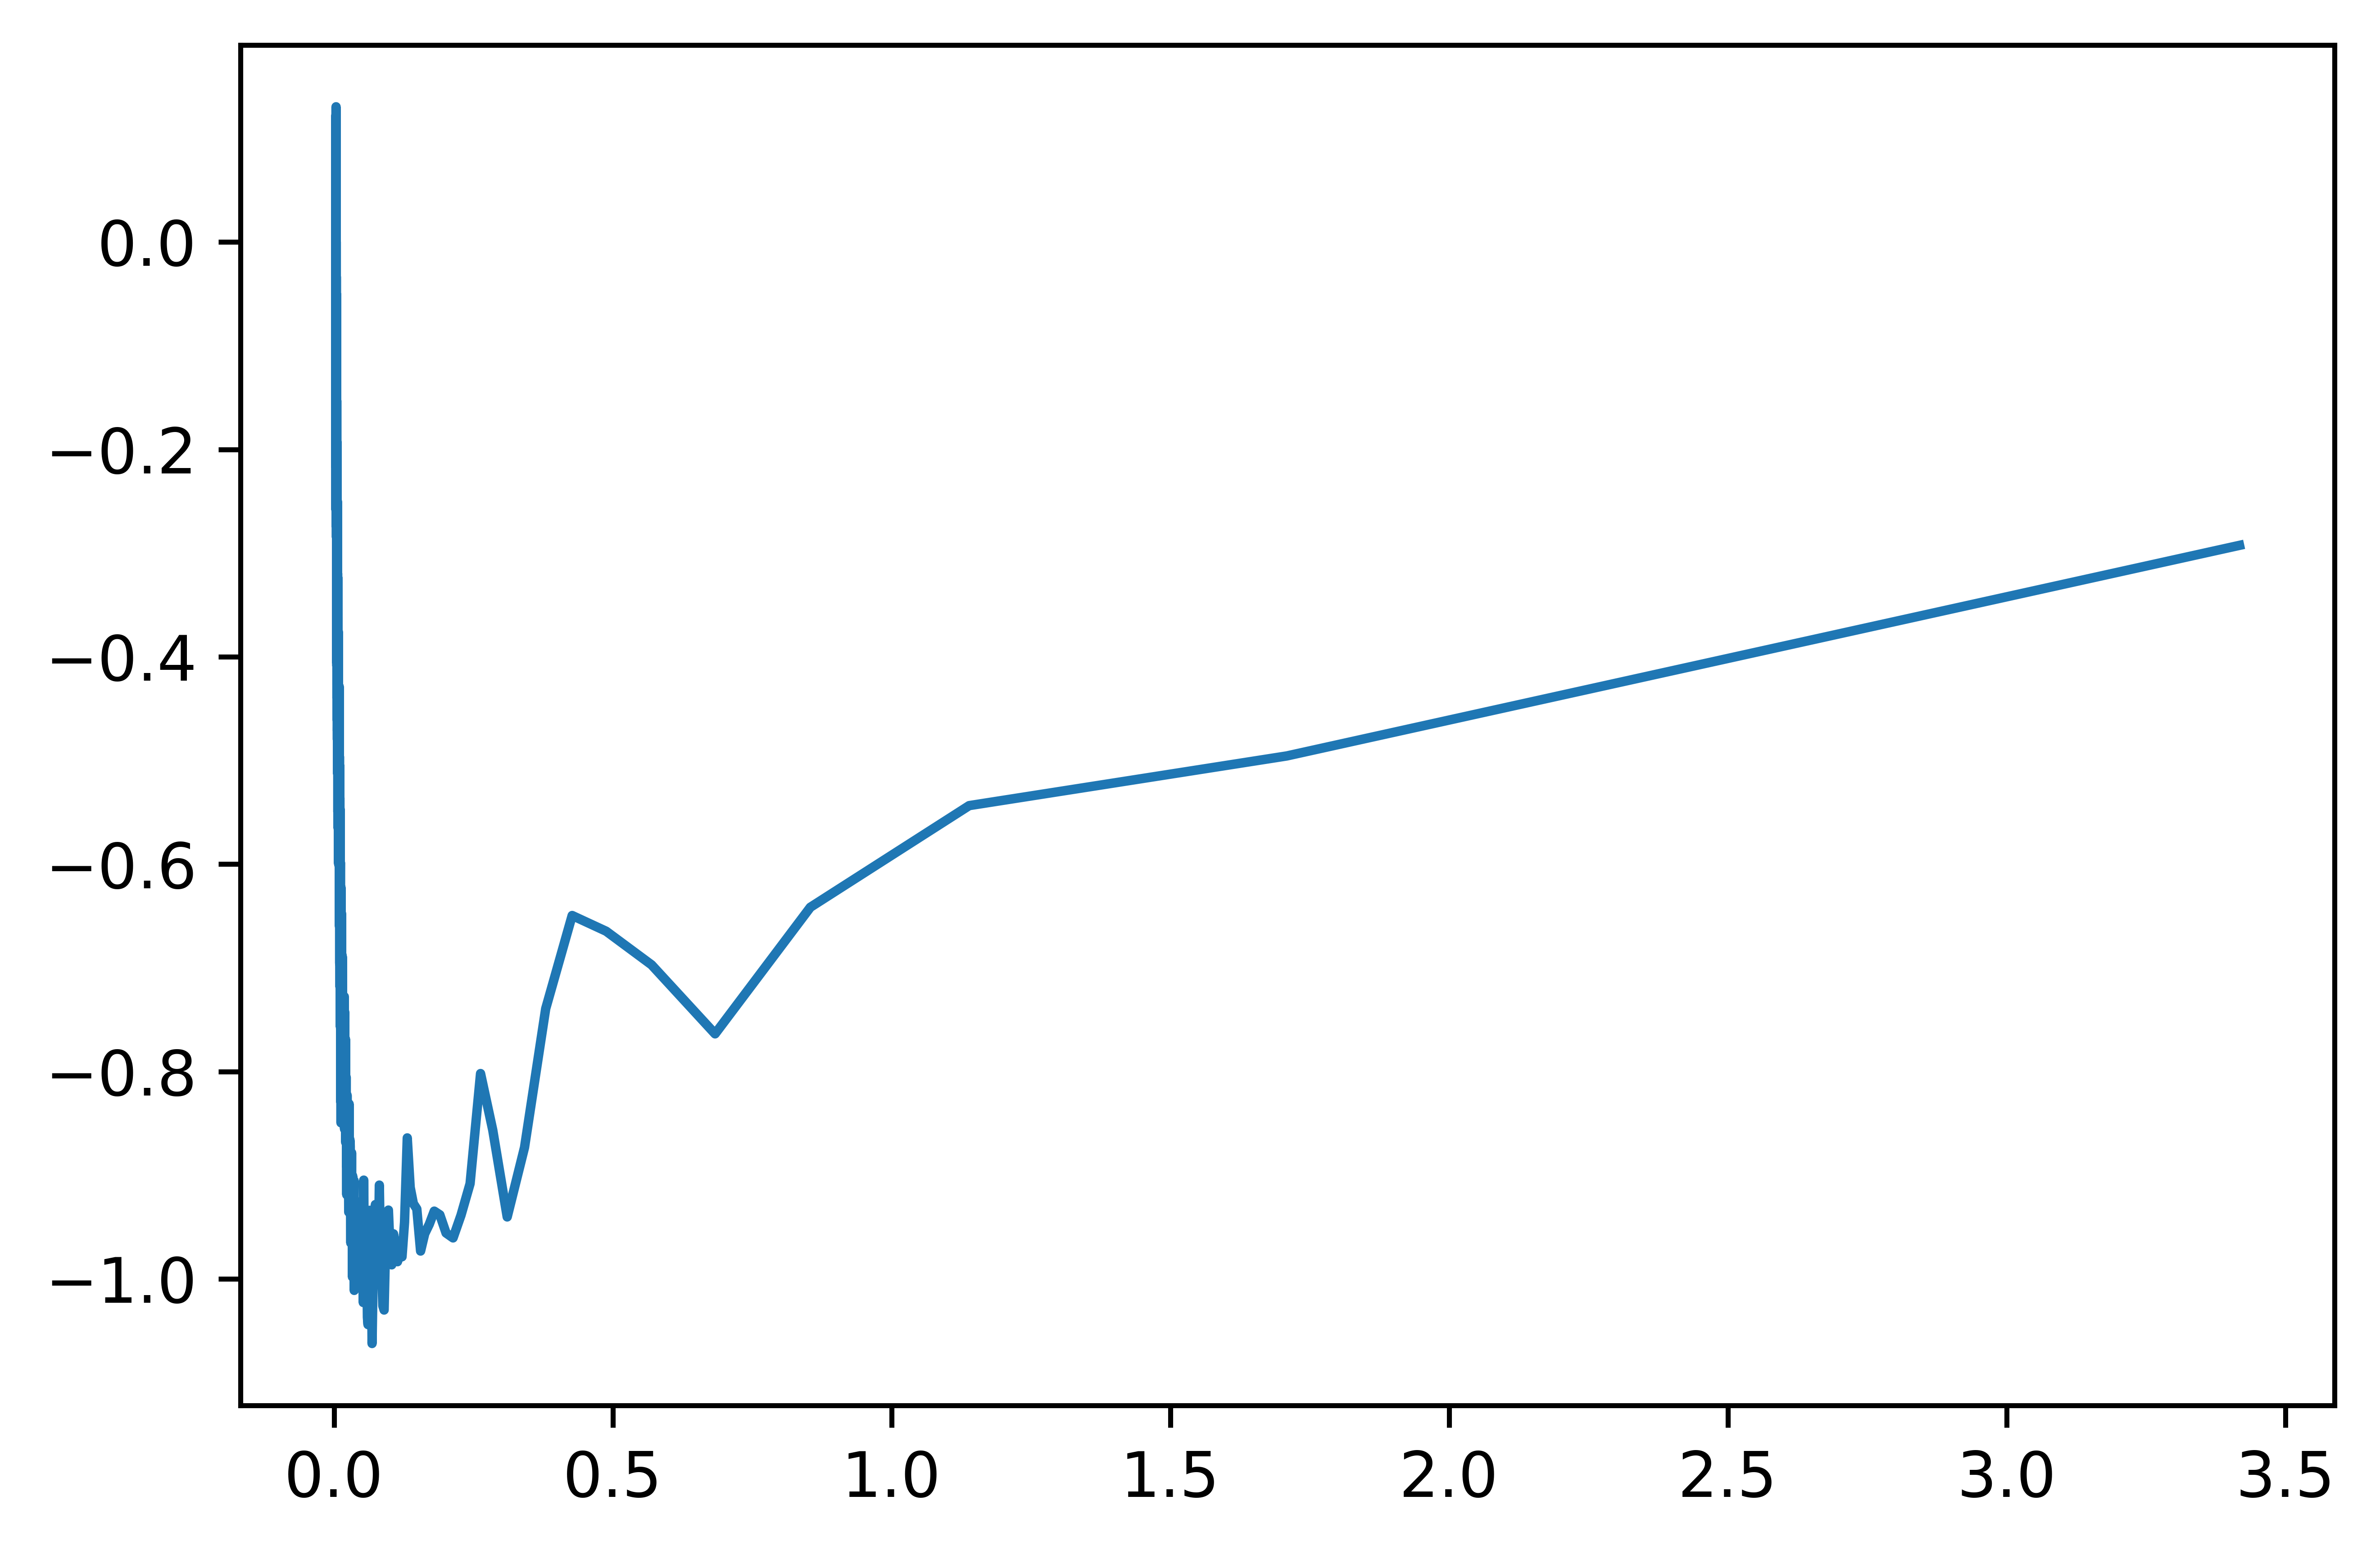

(49, 0.06835999999999998)

In [75]:
plt.figure(dpi=1000)
plt.plot(bin_widths, estimator)
plt.show()
np.argmin(estimator), bin_widths[np.argmin(estimator)]

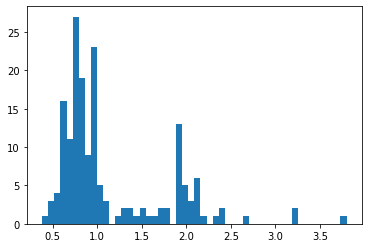

In [79]:
plt.hist(final_data, bins=50)
plt.title('')
plt.show()